![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [153]:
#load data
men = pd.read_csv("men_results.csv")
women = pd.read_csv("women_results.csv")

1. Exploratory Data Analysis

In [154]:
men.head(3)

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly


In [155]:
men.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB


In [156]:
men.describe()

,Unnamed: 0,home_score,away_score
count,44353.000000,44353.000000,44353.000000
mean,22176.000000,1.740559,1.178793
std,12803.752581,1.748722,1.394580
min,0.000000,0.000000,0.000000
25%,11088.000000,1.000000,0.000000
50%,22176.000000,1.000000,1.000000
75%,33264.000000,2.000000,2.000000
max,44352.000000,31.000000,21.000000


In [157]:
men.tournament.unique()

array(['Friendly', 'British Home Championship', 'Évence Coppée Trophy',
       'Copa Lipton', 'Copa Newton', 'Copa Premio Honor Argentino',
       'Copa Premio Honor Uruguayo', 'Copa Roca', 'Copa América',
       'Copa Chevallier Boutell', 'Nordic Championship',
       'Central European International Cup', 'Baltic Cup', 'Balkan Cup',
       'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'Bolivarian Games',
       'CCCF Championship', 'NAFC Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'Phillip Seaga Cup',
       'CONCACAF Championship', 'Copa Ju

In [158]:
women.head(3)

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro


In [180]:
women.tournament.unique()

array(['Euro', 'AFC Championship', 'UEFA Euro qualification',
       'OFC Championship', 'UEFA Euro', 'African Championship',
       'CONCACAF Championship', 'Copa América', 'FIFA World Cup',
       'CONCACAF Invitational Tournament', 'Algarve Cup', 'Olympic Games',
       'Four Nations Tournament', 'African Championship qualification',
       'CONCACAF Gold Cup qualification', 'CONCACAF Gold Cup',
       'AFC Asian Cup qualification', 'AFC Asian Cup', 'Cyprus Cup',
       'Olympic Games qualification', 'Friendly', 'SheBelieves Cup',
       'FIFA World Cup qualification', 'Tournament of Nations',
       'OFC Nations Cup qualification', 'African Cup of Nations',
       'OFC Nations Cup', 'Tournoi de France',
       "Basque Country Women's Cup",
       'African Cup of Nations qualification'], dtype=object)

In [160]:
women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int64(3), object(4)
memory usage: 267.2+ KB


In [161]:
women.describe()

,Unnamed: 0,home_score,away_score
count,4884.000000,4884.000000,4884.000000
mean,2441.500000,2.272727,1.431409
std,1410.033688,2.736377,1.974651
min,0.000000,0.000000,0.000000
25%,1220.750000,0.000000,0.000000
50%,2441.500000,1.000000,1.000000
75%,3662.250000,3.000000,2.000000
max,4883.000000,24.000000,24.000000


Filtering data according to matches and date specified.

In [162]:
men_fifa = men.query("tournament == 'FIFA World Cup' and date > '2002-01-01'")

In [163]:
men_fifa["total_score"] = men_fifa["home_score"] + men_fifa["away_score"]

In [164]:
women_fifa = women.query("tournament == 'FIFA World Cup' and date > '2002-01-01'")

In [165]:
women_fifa["total_score"] = women_fifa["home_score"] + women_fifa["away_score"]

2. Normality Check

2.1. Histogram

Text(0.5, 0.98, 'Total Score in FIFA World Cup')

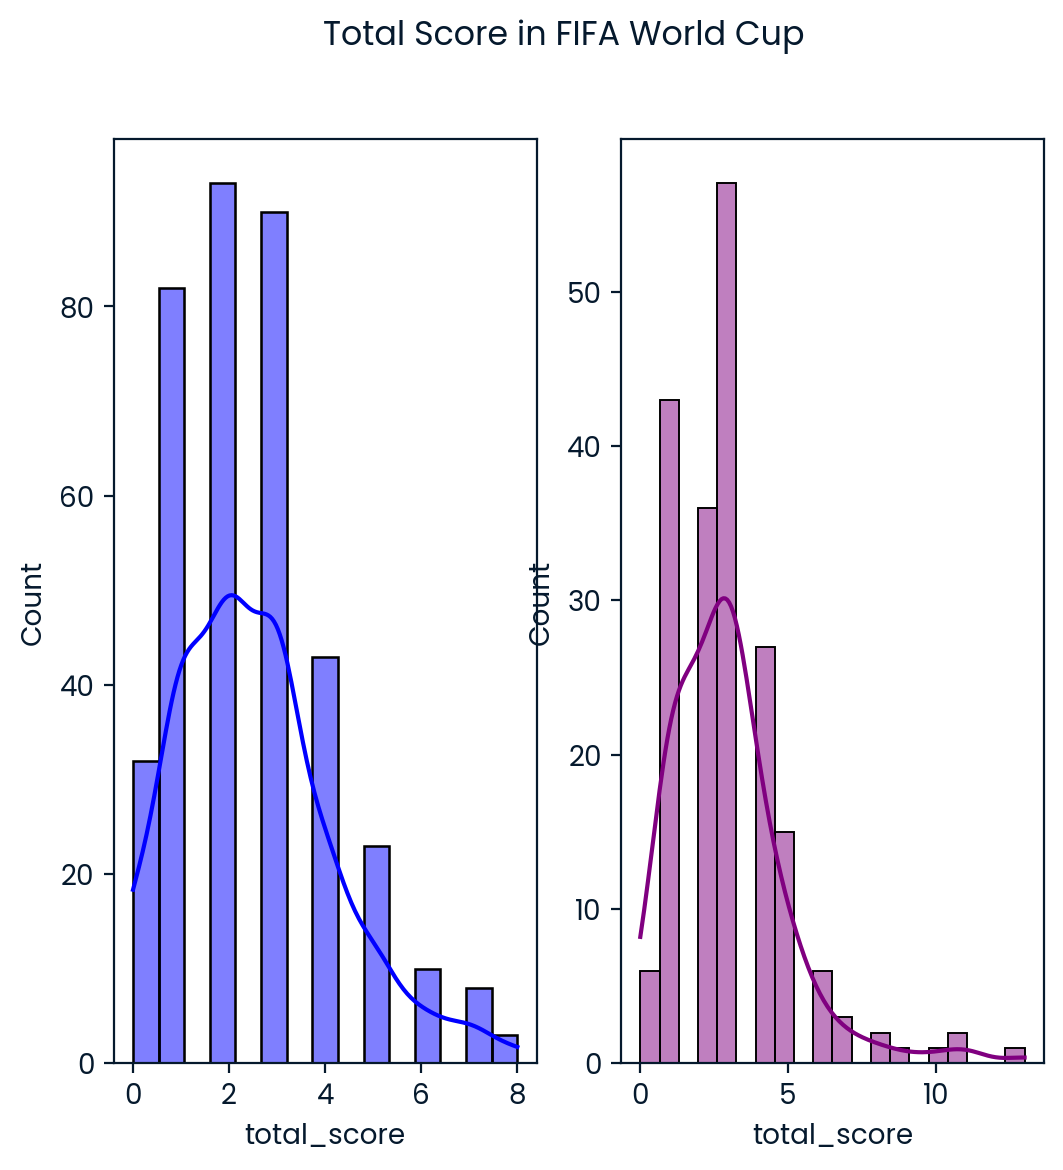

In [166]:
fig,axs = plt.subplots(1,2, figsize = (6,6))
sns.histplot(data=men_fifa, x="total_score", kde=True, color="blue", ax=axs[0])
sns.histplot(data=women_fifa, x="total_score", kde=True, color="purple", ax=axs[1])
fig.suptitle('Total Score in FIFA World Cup')

In [167]:
men_fifa.shape, women_fifa.shape

((384, 8), (200, 8))

2.2. Kolmogorov-Smirnov Test

In [168]:
from scipy.stats import kstest

In [169]:
kstest(men_fifa["total_score"], 'norm')

KstestResult(statistic=0.7580114127352096, pvalue=4.802304083566536e-230)

In [170]:
kstest(women_fifa["total_score"], 'norm')

KstestResult(statistic=0.8113447460685429, pvalue=9.431656241073109e-144)

The null hypothesis for the Kolmogorov-Smirnov test is that the sample has a specific distribution whereas the alternative hypothesis claims the reverse. The null hypothesis should be rejected according to p-value results for men_fifa and women_fifa. Namely, these two datasets are not distributed normally.

3. Hypothesis Testing

In [171]:
import scipy.stats

In [172]:
mvu = scipy.stats.mannwhitneyu(x = women_fifa["total_score"], y = men_fifa["total_score"], alternative = "greater")

In [173]:
mvu

MannwhitneyuResult(statistic=43273.0, pvalue=0.005106609825443641)

p-value (0.0051) is less than the significance level of 0.1, the null hypothesis can be rejected. 
Since the null hypothesis claims that two samples do not differentiate much in score, it can be said that women scored better than men in FIFA World Cup matches.

In [174]:
result_dict = { "p_val": mvu.pvalue, "result": 'reject'}

In [175]:
result_dict

{'p_val': 0.005106609825443641, 'result': 'reject'}